In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



def pseudo_exp_events(frame, name):
    values = []
    for i in range(len(name)):
        try:
            frame['source'].value_counts()[i]
            values.append(frame['source'].value_counts()[i])
        except KeyError:
            values.append(0)
            
    return pd.DataFrame(dict(name=name,pseudo_exp_events=values))

# DATA

In [7]:
!ls ../../data/andresData/SI-run0and1

SI-run01  SI-run02


In [8]:
# where are your files?
datFolder = '../../data/andresData/SI-run0and1/SI-run02/'

In [9]:
pars = np.loadtxt(datFolder+'pars.txt')
rate = np.loadtxt(datFolder+'rate.txt')
diff_rate = np.loadtxt(datFolder+'diff_rate.txt')

s1s2_WIMP = np.loadtxt(datFolder+'s1s2_WIMP.txt')
s1s2_er = np.loadtxt(datFolder+'s1s2_er.txt')
s1s2_ac = np.loadtxt(datFolder+'s1s2_ac.txt')
s1s2_cevns_SM = np.loadtxt(datFolder+'s1s2_CEVNS-SM.txt')
s1s2_radio = np.loadtxt(datFolder+'s1s2_radiogenics.txt')
s1s2_wall = np.loadtxt(datFolder+'s1s2_wall.txt')

In [10]:
###################
# shape of things #
###################
# we should get the same number of events in every file

print(pars.shape)
print(rate.shape)
print(diff_rate.shape)

# these are heavy guys:
# signal:
print(s1s2_WIMP.shape)
# backgronds:
print(s1s2_er.shape)
print(s1s2_ac.shape)
print(s1s2_cevns_SM.shape)
print(s1s2_radio.shape)
print(s1s2_wall.shape)



###############
# EXTRA FILES # backgrounds
###############
print(np.loadtxt(datFolder+'s1s2_CEVNS-NSI.txt').shape)
print(np.loadtxt(datFolder+'s1s2_EVES-NSI.txt').shape)
print(np.loadtxt(datFolder+'s1s2_EVES-SM.txt').shape)

(1679, 3)
(1679, 4)
(1679, 100)
(1679, 9409)
(1679, 9409)
(1679, 9409)
(1679, 9409)
(1679, 9409)
(1679, 9409)
(1679, 9409)
(1679, 9409)
(1679, 9409)


# Parameters of the model

[mass, cross section(or amplitude), phase]

In [11]:
# [mass, cross section(or amplitude), phase]

pars[0:5]

array([[ 3.11287e+02,  2.65083e-45,  7.59170e-01],
       [ 5.68869e+01,  6.89030e-45, -9.58584e-01],
       [ 7.55335e+01,  3.44202e-49,  2.48716e-01],
       [ 2.82323e+01,  5.73175e-50, -3.14905e-01],
       [ 1.15734e+01,  2.14041e-50, -5.47858e-01]])

In [12]:
# these are the ranges:

mass_cube = [6,1000]
cross_cube = [-50,-43] # the scan is in log10, but in pars.txt the cross section is given by its value, ej. 2.34*10^-45
theta_cube = [-np.pi/2,np.pi/2]



# Rate and Diff_rate 
(some info is redundant data, can be obtained from the s1s2 files)

#### Rate

1st position: expected number of TOTAL events (without the extra files) -> not experimental measurement

2nd position: expected number of SIGNAL events -> not experimental measurement


3rd position: number of TOTAL events in the particular pseudo-experiment that was generated for this parameters (without the extra files)

4th position: number of SIGNAL events in the particular pseudo-experiment

In [13]:
rate[0:5]

array([[3.85137640e+03, 1.00420410e+03, 3.92500000e+03, 9.88000000e+02],
       [2.41778403e+04, 2.13306680e+04, 2.41710000e+04, 2.13220000e+04],
       [2.84718390e+03, 1.16000000e-02, 2.79900000e+03, 0.00000000e+00],
       [2.84720930e+03, 3.70000000e-02, 2.83800000e+03, 0.00000000e+00],
       [2.84717510e+03, 2.80000000e-03, 2.81700000e+03, 0.00000000e+00]])

##### rate 3rd position from the s1s2 files

In [14]:
for i in range(5):
    sum_evs_total = sum(s1s2_WIMP[i]) + sum(s1s2_er[i]) + sum(s1s2_ac[i]) + sum(s1s2_cevns_SM[i]) + sum(s1s2_radio[i]) + sum(s1s2_wall[i])
    print(sum_evs_total)

3925.0
24171.0
2799.0
2838.0
2817.0


##### rate 4th position from the s1s2 files

In [15]:
for i in range(5):
    sum_evs_WIMP = sum(s1s2_WIMP[i])
    print(sum_evs_WIMP)

988.0
21322.0
0.0
0.0
0.0


#### Diff_rate

it has the differential event rate as a function of the recoil energy


but this is the theoretical one, not an experimental measurement

a ~ diff_rate can be obtained from the s1s2, but I havent implemented yet

In [16]:
diff_rate.shape

(1679, 100)

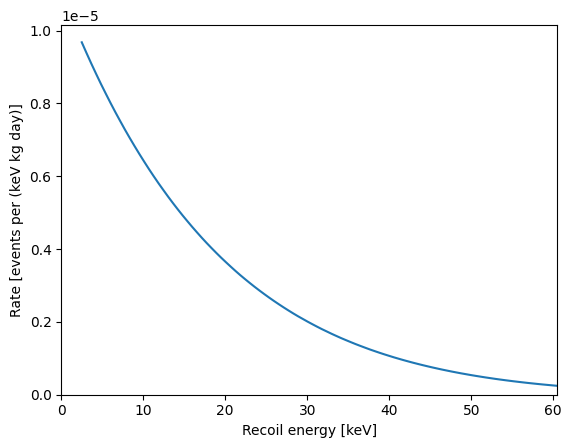

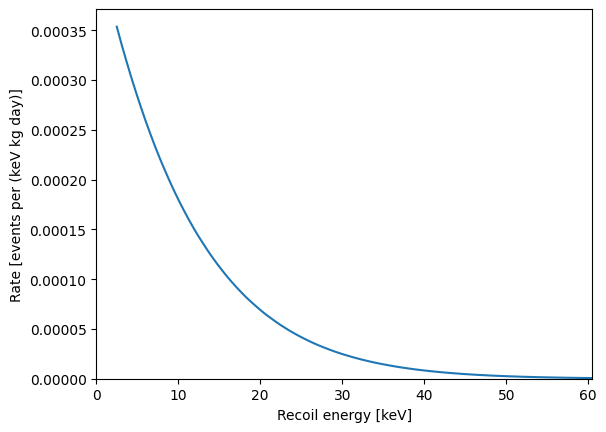

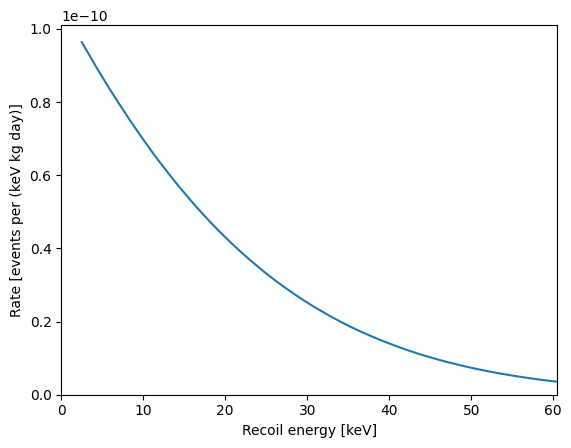

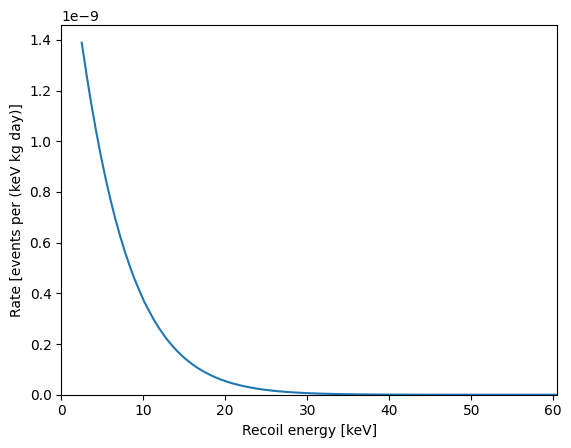

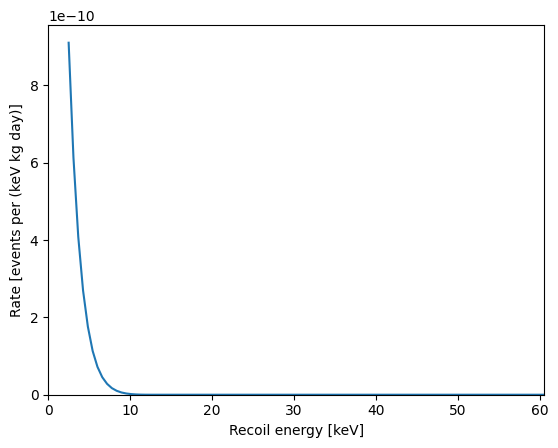

In [17]:
e_ee_vec_XenonnT_20ty=np.linspace(2.5,60.5,100) # the linear space used to generate the diff_rate

for i in range(5):
    plt.plot(e_ee_vec_XenonnT_20ty, diff_rate[i])
    plt.xlabel("Recoil energy [keV]")
    plt.ylabel("Rate [events per (keV kg day)]")
    plt.xlim(0, e_ee_vec_XenonnT_20ty.max())
    plt.ylim(0, None)

    plt.show()

# S1S2 data
this is all we need, this are the pseudo-experiments

##### signal
s1s2_WIMP    dark matter

##### backgrounds
s1s2_er  ---->    electronic recoils (lots of things, solar neutrino EVES, isotopes, etc)

s1s2_ac  ----> accidental coincidences

s1s2_cevns_SM  ----> solar neutrinos CEVNS considering SM neutrinos (nuclear recoil)

s1s2_radio  ----> radiogenics, also called nuclear in some XENON papers

s1s2_wall  ----> wall isotopes I guess

In [18]:
s1s2_WIMP[0].shape

(9409,)

In [19]:
# These are stored as vectors
s1s2_WIMP[0].shape

(9409,)

In [20]:
# but should be matrices of 97*97
s1s2_WIMP[0].reshape( 97,97 )

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

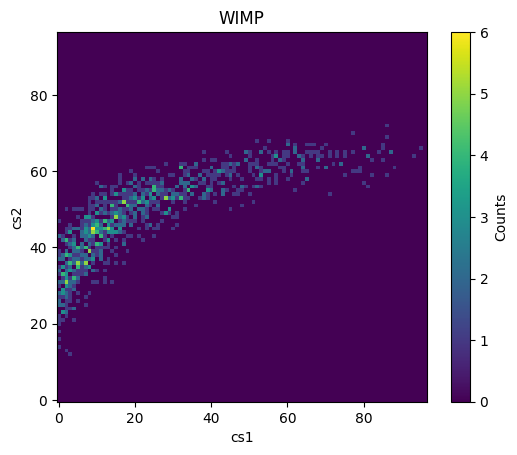

In [21]:
plt.imshow(s1s2_WIMP[0].reshape( 97,97 ).T, origin='lower', cmap='viridis')
plt.colorbar(label='Counts')  # Add a colorbar to the plot
plt.xlabel('cs1')
plt.ylabel('cs2')
#plt.yscale('log')
plt.title('WIMP')
plt.show()

#### Plot all the components of a pseudo experimet and the entire result (the sum of the components)

PARAMETER USED:
mass:  224.597
cross section (amplitude):  1.97699e-45
phase:  0.539803


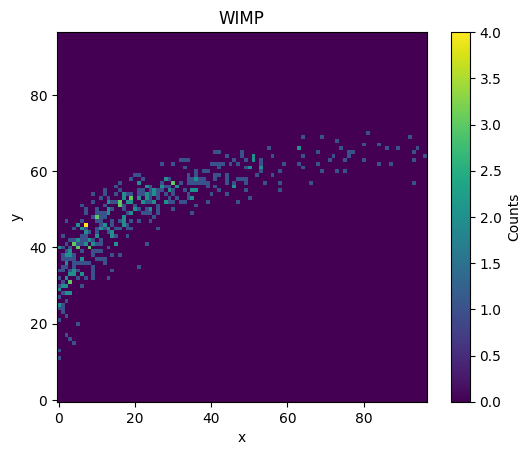

WIMP events:  447.0 



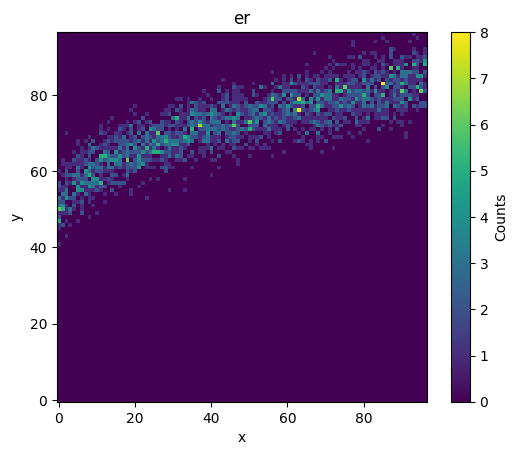

er events:  2382.0 



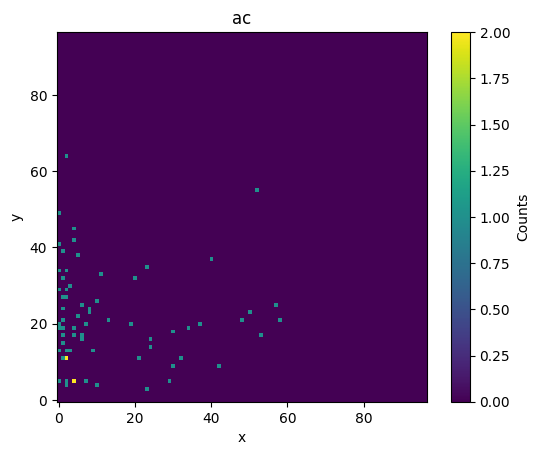

ac events:  69.0 



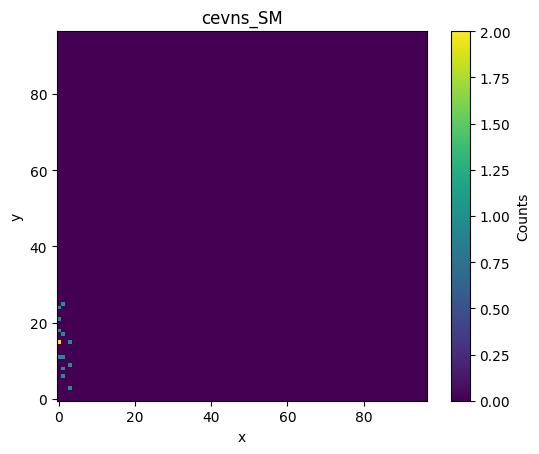

cevns_SM events:  14.0 



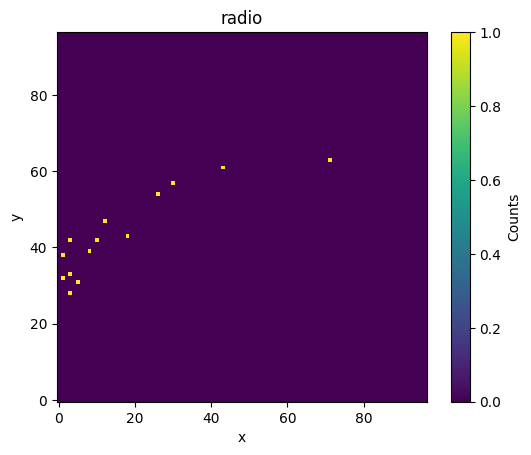

radio events:  14.0 



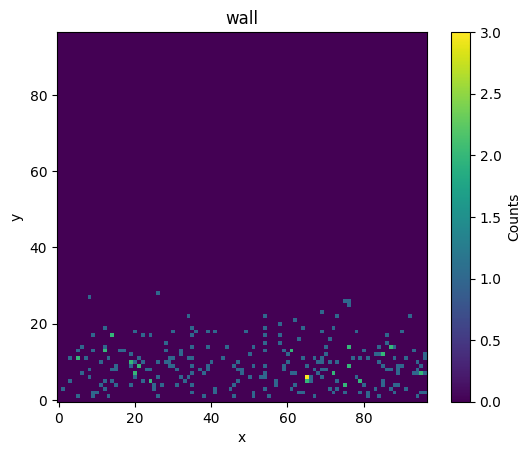

wall events:  254.0 

---------------------------------



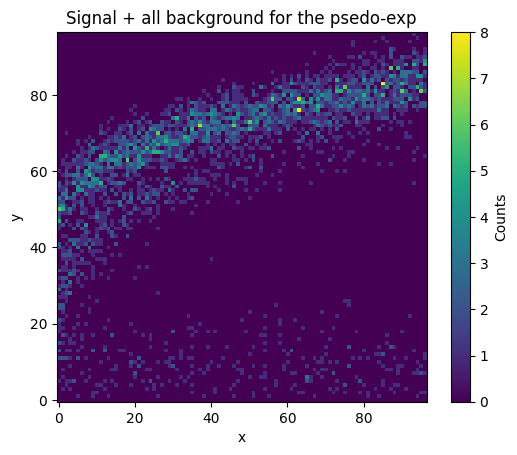

   for this pseudo-experiment
TOTAL events:  3180.0
SIGNAL events:  447.0 


Expected TOTAL # events: 3294.1726
Expected SIGNAL # events: 447.0003 



In [22]:
# number of pseudo experiment that we are plotting next
event = 5


print('PARAMETER USED:')
print('mass: ', pars[event][0])
print('cross section (amplitude): ', pars[event][1])
print('phase: ', pars[event][2])

# name of the sources
name = ['WIMP', 'er', 'ac', 'cevns_SM', 'radio', 'wall']

# dictionary with the names and the corresponding s1s2 data file
dic= {name[0]: s1s2_WIMP, name[1]: s1s2_er, name[2]: s1s2_ac, name[3]: s1s2_cevns_SM, name[4]: s1s2_radio, name[5]: s1s2_wall}


# now plot the pseudo experiment
# it would be for example s1s2_WIMP[0] if event = 0
# but you have to reshape it   s1s2_WIMP[0].reshape( 97,97 )

for ii in range(len(name)):
    
    reshaped_ev = dic[name[ii]][event].reshape( 97,97 ).T  # the .T to transpose, i dont know why
    
    plt.imshow(reshaped_ev, origin='lower', cmap='viridis')
    plt.colorbar(label='Counts')  # Add a colorbar to the plot
    plt.xlabel('x')
    plt.ylabel('y')
    #plt.yscale('log')
    plt.title(name[ii])
    plt.show()
    
    print(name[ii]+' events: ',sum(dic[name[ii]][event]), '\n')
    

print('---------------------------------\n')
    
    

signal_and_background = dic[name[0]][event] + dic[name[1]][event] + dic[name[2]][event] + dic[name[3]][event] + dic[name[4]][event] + dic[name[5]][event]
    
reshaped_ev_TOT = signal_and_background.reshape( 97,97 ).T  # the .T to transpose, i dont know why
    
plt.imshow(reshaped_ev_TOT, origin='lower', cmap='viridis')
plt.colorbar(label='Counts')  # Add a colorbar to the plot
plt.xlabel('x')
plt.ylabel('y')
#plt.yscale('log')
plt.title('Signal + all background for the psedo-exp')
plt.show()

print('   for this pseudo-experiment')
print('TOTAL events: ',sum(signal_and_background))
print('SIGNAL events: ',sum(dic[name[0]][event]), '\n')

print('')
print('Expected TOTAL # events:', rate[event][0])
print('Expected SIGNAL # events:', rate[event][1], '\n')


In [ ]:
# las imagenes de arriba en realidad tiene como labels el número de bin en la coordenada x e y
# las variables físicas son x --> cs1 e y --> cs2
# cs1 va de 3 a 100
# cs2 va de 100 a 10000
# cada coordenada uno tiene 97 bines

# binning
bin_to_plot = [np.linspace(3, 100, 98), np.logspace(*np.log10([100, 10000]), 98)]

# WHAT TO USE
pars.txt and s1s2.txt

to get the number of events do not use rate.txt, its better to use -> sum(s1s2)
